In [2]:
# for data wrangling
import pandas as pd
from pandas import json_normalize

# for stats
import numpy as np
import statistics
import math
from scipy.stats import pearsonr, f_oneway, tukey_hsd, spearmanr

# for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# for regex
import re

#### Main Experiment

In [3]:
data = pd.read_csv('topics-post-RADAR-data.csv')

In [4]:
data.columns 

Index(['id', 'File', 'Topic', 'Student', 'Student_Reformatted',
       'Grammarly_Score', 'STUD_Grammarly_Red', 'STUD_Grammarly_All',
       'ChatGPT-3', 'ChatGPT-4', 'GPT-4_Paraphrasing.io',
       'GPT-4_Paraphrasing.io_MANUALLYCORRECTED', 'GPT-4_Quillbot',
       'GPT-4_Grammarly', 'GPT-4_WordAi', 'STUD_sent_count', 'GPT3_sent_count',
       'GPT4_sent_count', 'STUD_word_count', 'GPT3_word_count',
       'GPT4_word_count', 'STUD_RADAR', 'STUD_REFORMATTED', 'STUD_RED_RADAR',
       'STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
       'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
       'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'],
      dtype='object')

In [5]:
columns_to_keep = ['STUD_REFORMATTED', 'STUD_RED_RADAR',
       'STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
       'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

melted_data = data[columns_to_keep]

melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')

In [6]:
melted_data.head(10)

,Category,RADAR_output
0,STUD_REFORMATTED,0.519651
1,STUD_REFORMATTED,0.151184
2,STUD_REFORMATTED,0.138196
3,STUD_REFORMATTED,0.176322
4,STUD_REFORMATTED,0.789585
5,STUD_REFORMATTED,0.840903
6,STUD_REFORMATTED,0.089198
7,STUD_REFORMATTED,0.717940
8,STUD_REFORMATTED,0.017443
9,STUD_REFORMATTED,0.016008


/tmp/ipykernel_5521/262365849.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['Human','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited'])


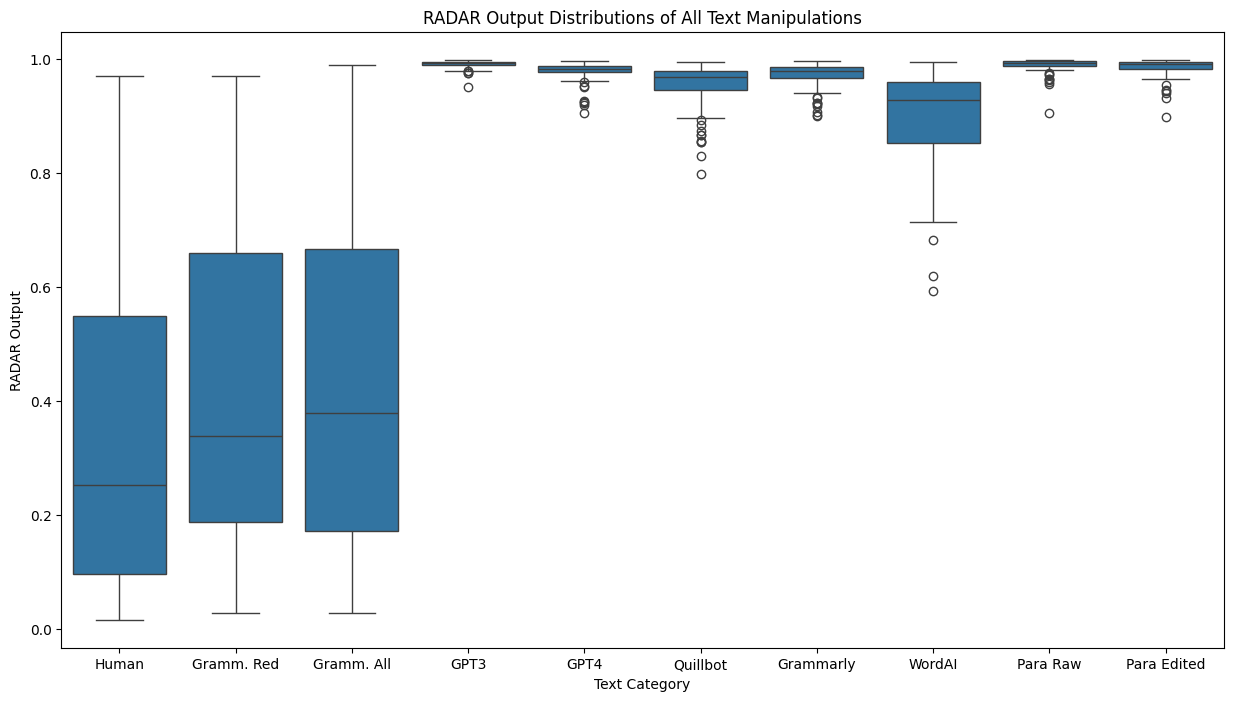

In [7]:
plt.figure(figsize=(15, 8)) 
g = sns.boxplot(data=melted_data, y='RADAR_output', x='Category')
# plt.xticks(rotation=90)
plt.title('RADAR Output Distributions of All Text Manipulations')
plt.ylabel('RADAR Output')
plt.xlabel('Text Category')
g.set(xticklabels=['Human','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited']) 
plt.show()

/tmp/ipykernel_5521/2566095935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.stripplot(data=melted_data, x = 'Category', y = 'RADAR_output', size=3, palette='husl')
/tmp/ipykernel_5521/2566095935.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['Human','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited'])


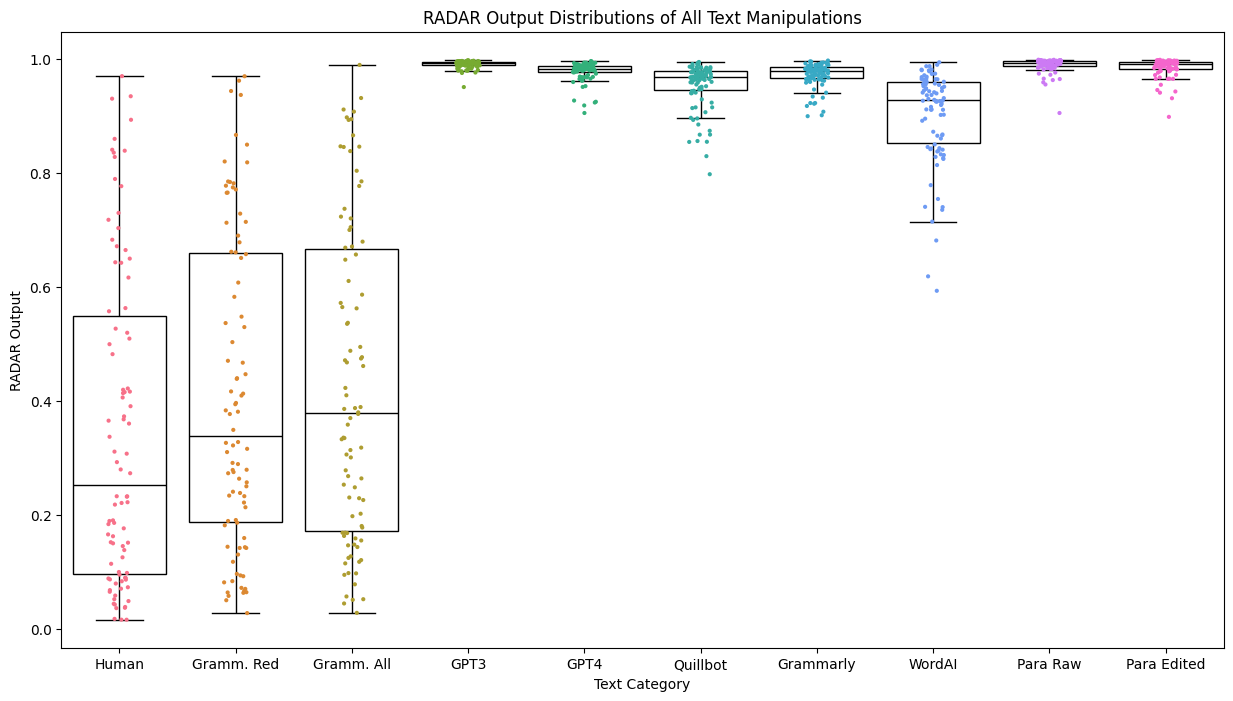

In [8]:
plt.figure(figsize=(15, 8)) 
g = sns.stripplot(data=melted_data, x = 'Category', y = 'RADAR_output', size=3, palette='husl')
sns.boxplot(data=melted_data, x = 'Category', y = 'RADAR_output', color='White', linecolor='Black', fliersize=0)
plt.title('RADAR Output Distributions of All Text Manipulations')
plt.ylabel('RADAR Output')
plt.xlabel('Text Category')
g.set(xticklabels=['Human','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited']) 
plt.show()

In [9]:
# Perform ANOVA
f_oneway(data['STUD_REFORMATTED'], data['STUD_RED_RADAR'],
             data['STUD_ALL_RADAR'],  data['GPT3_RADAR'],  data['GPT4_RADAR'],  data['GPT4_Paraphrasing_IO_RAW_RADAR'],
              data['GPT4_Paraphrasing_IO_EDITED_RADAR'],  data['GPT4_Quillbot_RADAR'],
               data['GPT4_Grammarly_RADAR'],  data['GPT4_WordAI_RADAR'])

F_onewayResult(statistic=295.8352286896345, pvalue=1.8366292994965066e-260)

In [10]:
# Perform ANOVA
f_oneway(data['STUD_REFORMATTED'], data['GPT3_RADAR'],  data['GPT4_RADAR'])

F_onewayResult(statistic=468.78647043619145, pvalue=4.4466620991013023e-88)

In [25]:
# Perform Follow Up Tukey Tests
res = tukey_hsd(data['STUD_REFORMATTED'], data['GPT3_RADAR'],  data['GPT4_RADAR'])
print(res)

stats = pd.DataFrame(res.statistic)
pvalues = pd.DataFrame(res.pvalue)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.644     0.000    -0.701    -0.588
 (0 - 2)     -0.632     0.000    -0.689    -0.575
 (1 - 0)      0.644     0.000     0.588     0.701
 (1 - 2)      0.012     0.864    -0.044     0.069
 (2 - 0)      0.632     0.000     0.575     0.689
 (2 - 1)     -0.012     0.864    -0.069     0.044



In [28]:
stats

,0,1,2
0,0.000000,-0.644445,-0.632040
1,0.644445,0.000000,0.012405
2,0.632040,-0.012405,0.000000


#### Does Text Length Impact RADAR False Positive Rate?

In [12]:
text_length_RADAR = pd.read_csv('topics-length-specific-RADAR.csv')

In [13]:
text_length_RADAR.head(4)

,text_id,pre_processed_text,paragraph_id,word_count,RADAR_outputs
0,0,It is always said that competition can effecti...,0,84,0.996356
1,0,It is always said that competition can effecti...,1,189,0.983723
2,0,It is always said that competition can effecti...,2,333,0.848712
3,0,It is always said that competition can effecti...,3,369,0.570650


In [14]:
# Perform Pearson correlation test
corr_coeff, p_value = spearman(text_length_RADAR['word_count'], 
                               text_length_RADAR['RADAR_outputs'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson correlation coefficient: -0.5404030537642682
p-value: 3.835439625898414e-33


In [15]:
text_sources = ['STUD_word_count', 'GPT3_word_count','GPT4_word_count']

text_lengths = data[text_sources]

text_lengths = pd.melt(text_lengths)

text_lengths

,variable,value
0,STUD_word_count,367
1,STUD_word_count,323
2,STUD_word_count,251
3,STUD_word_count,279
4,STUD_word_count,258
...,...,...
265,GPT4_word_count,250
266,GPT4_word_count,262
267,GPT4_word_count,275
268,GPT4_word_count,245


<Axes: xlabel='variable', ylabel='value'>

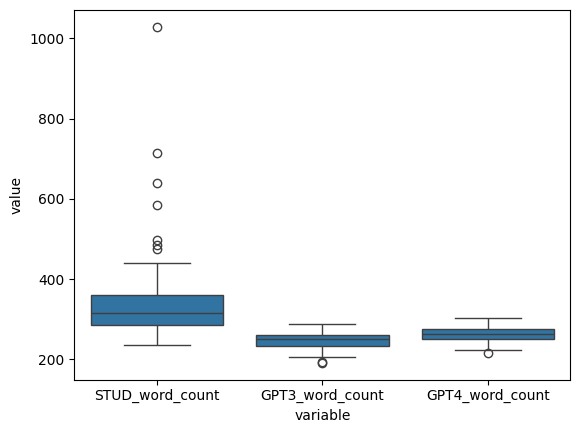

In [16]:
sns.boxplot(data=text_lengths, x='variable', y='value')

In [17]:
f_oneway(data['STUD_word_count'], data['GPT3_word_count'], data['GPT4_word_count'])

F_onewayResult(statistic=50.75745132832277, pvalue=2.0773205014630515e-19)

In [18]:
res = tukey_hsd(data['STUD_word_count'], data['GPT3_word_count'], data['GPT4_word_count'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     91.178     0.000    68.261   114.094
 (0 - 2)     76.622     0.000    53.706    99.539
 (1 - 0)    -91.178     0.000  -114.094   -68.261
 (1 - 2)    -14.556     0.294   -37.472     8.361
 (2 - 0)    -76.622     0.000   -99.539   -53.706
 (2 - 1)     14.556     0.294    -8.361    37.472



In [19]:
length_correlation_check = ['STUD_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'STUD_word_count', 'GPT3_word_count', 'GPT4_word_count']
length_correlation_check = data[length_correlation_check]

df_x = pd.melt(length_correlation_check, id_vars=[], value_vars=['STUD_word_count', 'GPT3_word_count', 'GPT4_word_count'], var_name='x_var', value_name='x_value')
df_y = pd.melt(length_correlation_check, id_vars=[], value_vars=['STUD_RADAR', 'GPT3_RADAR', 'GPT4_RADAR'], var_name='y_var', value_name='y_value')

df_melted = pd.concat([df_x.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)
df_melted

,x_var,x_value,y_var,y_value
0,STUD_word_count,367,STUD_RADAR,0.570650
1,STUD_word_count,323,STUD_RADAR,0.132299
2,STUD_word_count,251,STUD_RADAR,0.138674
3,STUD_word_count,279,STUD_RADAR,0.126367
4,STUD_word_count,258,STUD_RADAR,0.666776
...,...,...,...,...
265,GPT4_word_count,250,GPT4_RADAR,0.983242
266,GPT4_word_count,262,GPT4_RADAR,0.979722
267,GPT4_word_count,275,GPT4_RADAR,0.983915
268,GPT4_word_count,245,GPT4_RADAR,0.980860


<Axes: xlabel='x_value', ylabel='y_value'>

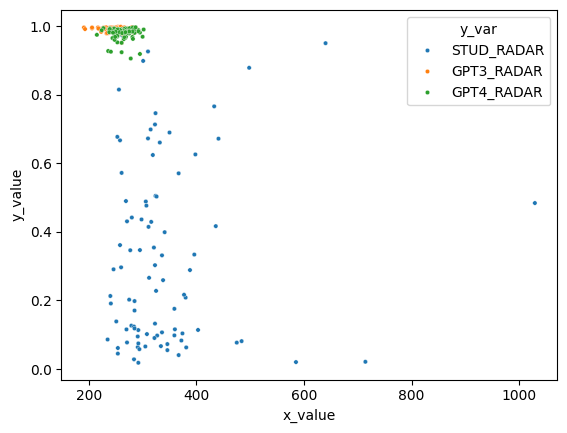

In [20]:
sns.scatterplot(data=df_melted, x='x_value', y='y_value', hue='y_var', s=10)

In [21]:
# Perform Pearson correlation test
corr_coeff, p_value = pearsonr(data['GPT4_word_count'], 
                               data['GPT4_RADAR'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson correlation coefficient: 0.018505013389689805
p-value: 0.8625611928121127


In [22]:
# Perform Pearson correlation test
corr_coeff, p_value = pearsonr(data['STUD_word_count'], 
                               data['STUD_RADAR'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson correlation coefficient: 0.07316886396483914
p-value: 0.49311851663087264


<Axes: xlabel='GPT4_word_count', ylabel='GPT4_RADAR'>

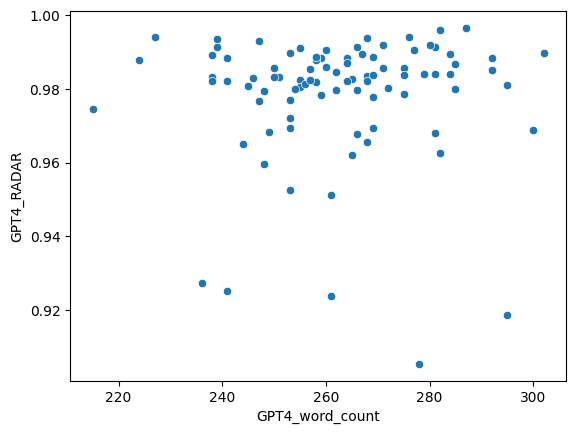

In [23]:
sns.scatterplot(data=data, x='GPT4_word_count', y='GPT4_RADAR')